<a href="https://colab.research.google.com/github/xyt556/Big_Data_Test/blob/master/%E8%81%9A%E7%B1%BB%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.KMeans
## 1.1简单例子

In [1]:
from sklearn.cluster import KMeans
import numpy as np
x = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])
Kmeans = KMeans(n_clusters=2,random_state=0).fit(x)
Kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [2]:
Kmeans.predict([[0,0],[12,3]])

array([1, 0])

In [3]:
Kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

## 1.2多种效果展示

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [5]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples= n_samples,random_state=random_state)

### 1.2.1给定错误聚类个数

In [6]:
y_pred = KMeans(n_clusters=2,random_state=random_state).fit_predict(X)

Text(0.5, 1.0, 'Incorrect Number of Blocks')

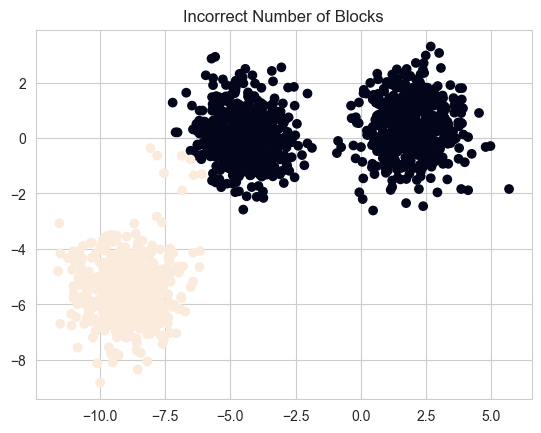

In [7]:
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Incorrect Number of Blocks')

### 1.2.2各向异性分布的数据

In [8]:
transformation = [[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X,transformation)

In [9]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X-X_aniso)

Text(0.5, 1.0, 'Anisotropicly Distributed Blocks')

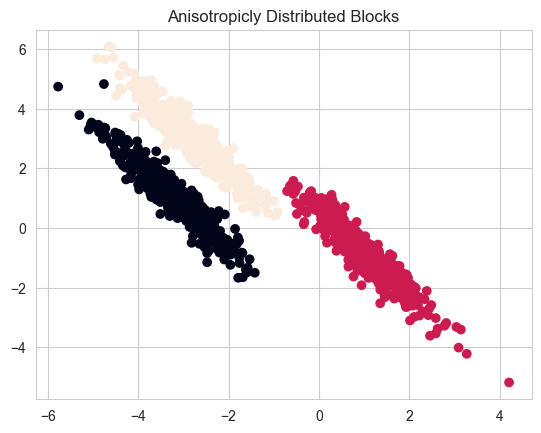

In [10]:
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=y_pred)
plt.title('Anisotropicly Distributed Blocks')

### 1.2.3每簇的方差不同

In [11]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0,2.5,0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X_varied)

Text(0.5, 1.0, 'Unequal Variance')

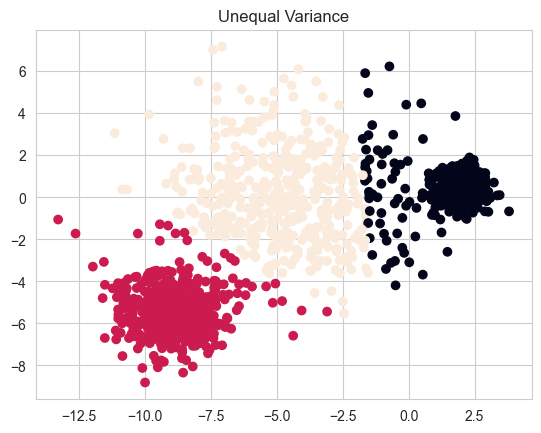

In [12]:
plt.scatter(X_varied[:,0],X_varied[:,1],c=y_pred)
plt.title('Unequal Variance')

### 簇的大小分布不均衡

In [13]:
X_filtered = np.vstack((X[y==0][:500],X[y==1][:100],X[y==2])[:10])
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X_filtered)

Text(0.5, 1.0, 'Unevenly Sized Blocks')

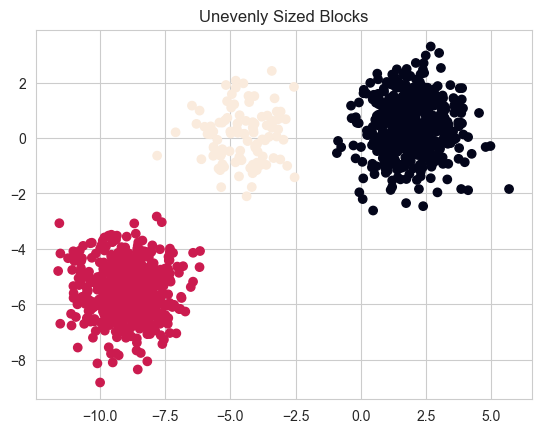

In [14]:
plt.scatter(X_filtered[:,0],X_filtered[:,1],c=y_pred)
plt.title('Unevenly Sized Blocks')

# 2.层次聚类之凝聚聚类
## 2.1简单例子

In [35]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np


In [36]:
X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])


In [40]:
clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering()

In [43]:
clustering = AgglomerativeClustering(affinity='euclidean',compute_full_tree='auto',
                                     connectivity=None,linkage='ward',memory=None,n_clusters=2)

clustering
                                     # ,pooling_func = <function mean at 0x00001D7F67B9840>

AgglomerativeClustering()

In [65]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

## 2.2聚类层次树-dendrogram

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import  AgglomerativeClustering

In [46]:
np.random.seed(1234)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_4','ID_4']
X= np.random.random_sample([5,3])*10
df = pd.DataFrame(X,columns=variables,index=labels)
print(df)

             X         Y         Z
ID_0  1.915195  6.221088  4.377277
ID_1  7.853586  7.799758  2.725926
ID_2  2.764643  8.018722  9.581394
ID_4  8.759326  3.578173  5.009951
ID_4  6.834629  7.127020  3.702508


In [47]:
row_clusters = linkage(pdist(df,metric='euclidean'),method='complete')
print(pd.DataFrame(row_clusters,columns=['row label1','row label2','distance','no. of items in clust.'],
                   index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])]))

           row label1  row label2  distance  no. of items in clust.
cluster 1         1.0         4.0  1.563509                     2.0
cluster 2         3.0         5.0  4.884559                     3.0
cluster 3         0.0         2.0  5.570985                     2.0
cluster 4         6.0         7.0  8.749445                     5.0


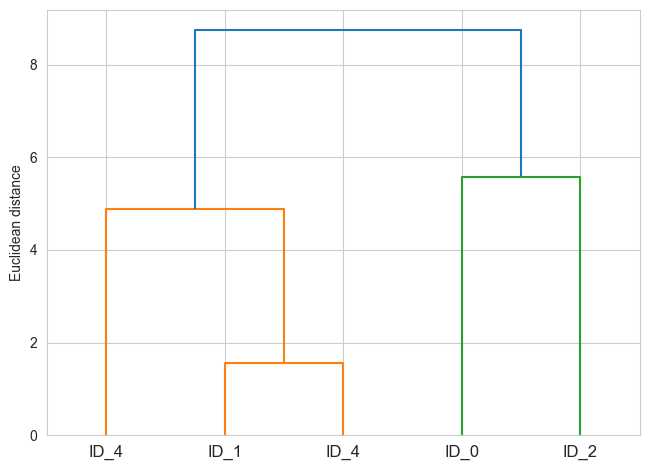

In [48]:
row_dendr = dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

# 3.DNSCAN
## 3.1简单例子


In [49]:
from sklearn.cluster import DBSCAN
import numpy as np


In [50]:
X = np.array([[1,2],[2,2],[2,3],
              [8,7],[8,8],[25,80]])


In [51]:
clustering = DBSCAN(eps=3,min_samples=2).fit(X)
clustering

DBSCAN(eps=3, min_samples=2)

In [52]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

## 3.2复杂例子

In [53]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics
from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [57]:
# 生成数据
centers = [[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs(n_samples=750,centers=centers,cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)

In [60]:
# 计算DBSCAN模型
db = DBSCAN(eps=0.3,min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels = db.labels_

In [61]:
# 统计基本结果
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('估计的聚类个数：%d' %n_clusters_)
print('估计的噪声点个数：%d' %n_noise_)

估计的聚类个数：3
估计的噪声点个数：18


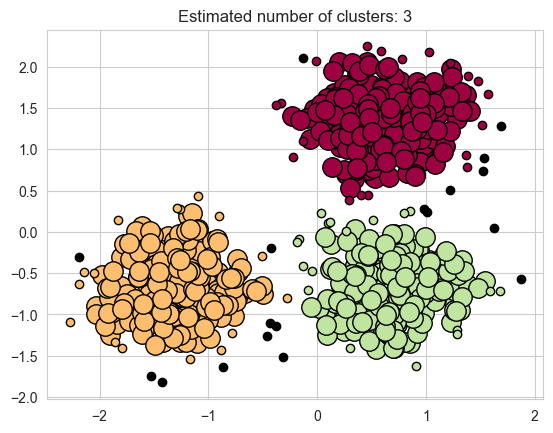

In [64]:
# 绘图展示
import matplotlib.pyplot as plt
# black removed and is used for noise instead
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # block used for noise
        col = [0,0,0,1]
    class_member_mask = (labels==k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor = tuple(col),markeredgecolor ='k',markersize = 14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor = tuple(col),markeredgecolor ='k',markersize = 6)
plt.title('Estimated number of clusters: %d' %n_clusters_)
plt.show()

